# Implementation of Decision Tree from Scratch

### Documentation to be continued...

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
data = pd.read_csv('hotel_experience.csv')

In [3]:
data.head(10)

,Unnamed: 0,id,Gender,Age,purpose_of_travel,Type of Travel,Type Of Booking,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness,overall experience
0,0,32746,Female,32,academic,Group Travel,Individual/Couple,5,5,2,5,5,5,5,1,2,5,good
1,1,52532,Male,44,business,Group Travel,Group bookings,3,3,3,3,5,3,4,2,4,1,good
2,2,62644,Male,64,tourism,Personal Travel,Individual/Couple,3,5,3,3,1,1,1,3,5,1,bad
3,3,57270,Female,36,academic,Group Travel,Group bookings,2,4,4,4,4,3,2,1,2,2,bad
4,4,18607,Female,80,tourism,Group Travel,Individual/Couple,2,4,2,5,4,4,4,2,2,4,bad
5,5,22406,Female,57,business,Group Travel,Individual/Couple,4,2,2,2,2,4,3,3,3,3,good
6,6,64260,Male,32,tourism,Group Travel,Group bookings,5,5,2,5,4,4,4,3,4,4,good
7,7,82864,Male,29,personal,Group Travel,Group bookings,1,1,1,1,5,5,5,3,4,5,good
8,8,113731,Female,7,tourism,Personal Travel,Individual/Couple,0,5,0,4,4,4,4,4,4,4,good
9,9,56594,Female,51,aviation,Group Travel,Group bookings,1,1,1,1,3,4,5,3,5,4,good


In [4]:
mydata=data.drop(['Unnamed: 0','id'], axis=1)
mydata.head(1)

,Gender,Age,purpose_of_travel,Type of Travel,Type Of Booking,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness,overall experience
0,Female,32,academic,Group Travel,Individual/Couple,5,5,2,5,5,5,5,1,2,5,good


In [5]:
mydata.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,100000.0,39.36621,15.122459,7.0,27.0,40.0,51.0,85.0
Hotel wifi service,100000.0,2.72942,1.327962,0.0,2.0,3.0,4.0,5.0
Departure/Arrival convenience,100000.0,3.06171,1.524823,0.0,2.0,3.0,4.0,5.0
Ease of Online booking,100000.0,2.75686,1.398951,0.0,2.0,3.0,4.0,5.0
Hotel location,100000.0,2.97742,1.276803,0.0,2.0,3.0,4.0,5.0
Food and drink,100000.0,3.20154,1.329879,0.0,2.0,3.0,4.0,5.0
Stay comfort,100000.0,3.43890,1.319433,0.0,2.0,4.0,5.0,5.0
Common Room entertainment,100000.0,3.35836,1.333123,0.0,2.0,4.0,4.0,5.0
Checkin/Checkout service,100000.0,3.30373,1.265509,0.0,3.0,3.0,4.0,5.0
Other service,100000.0,3.64056,1.176213,0.0,3.0,4.0,5.0,5.0


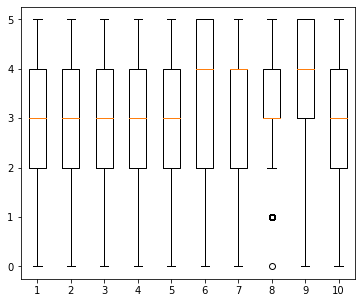

In [6]:
fig = plt.figure(figsize =(6, 5))
plt.boxplot(mydata.drop(['Age','Gender','purpose_of_travel','Type of Travel','Type Of Booking','overall experience'],axis='columns'))
plt.show()

In [7]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   Gender                          100000 non-null  object
 1   Age                             100000 non-null  int64 
 2   purpose_of_travel               100000 non-null  object
 3   Type of Travel                  100000 non-null  object
 4   Type Of Booking                 100000 non-null  object
 5   Hotel wifi service              100000 non-null  int64 
 6   Departure/Arrival  convenience  100000 non-null  int64 
 7   Ease of Online booking          100000 non-null  int64 
 8   Hotel location                  100000 non-null  int64 
 9   Food and drink                  100000 non-null  int64 
 10  Stay comfort                    100000 non-null  int64 
 11  Common Room entertainment       100000 non-null  int64 
 12  Checkin/Checkout service       

In [8]:
mydata.duplicated().sum()

1329

In [9]:
data.id.duplicated().sum()

0

In [10]:
corr = mydata.corr()

''

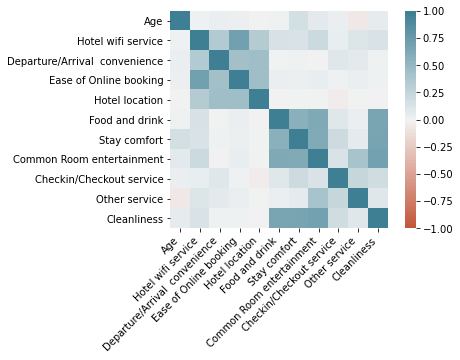

In [11]:
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right')
;

<Figure size 432x288 with 0 Axes>

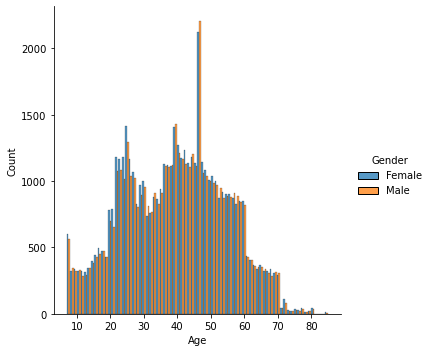

In [12]:
plt.figure()
sns.displot(mydata, x="Age", hue="Gender", multiple="dodge")
plt.show()

In [13]:
mydata.rename(columns = {'Type of Travel': 'Travel_type', 'Type Of Booking': 'Booking_type', 'overall experience': 'Overall_experience'}, inplace = True)


In [14]:
travel_purposes=[]
for i in range(len(mydata.purpose_of_travel)):
    if mydata.purpose_of_travel[i] not in travel_purposes:
            travel_purposes.append(mydata.purpose_of_travel[i])
travel_purposes



['academic', 'business', 'tourism', 'personal', 'aviation']

In [15]:
def str_to_num(s):
    if s in travel_purposes:
        return travel_purposes.index(s)
    else:
        return s

mydata.purpose_of_travel=mydata.purpose_of_travel.map(str_to_num)
mydata.head()

,Gender,Age,purpose_of_travel,Travel_type,Booking_type,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness,Overall_experience
0,Female,32,0,Group Travel,Individual/Couple,5,5,2,5,5,5,5,1,2,5,good
1,Male,44,1,Group Travel,Group bookings,3,3,3,3,5,3,4,2,4,1,good
2,Male,64,2,Personal Travel,Individual/Couple,3,5,3,3,1,1,1,3,5,1,bad
3,Female,36,0,Group Travel,Group bookings,2,4,4,4,4,3,2,1,2,2,bad
4,Female,80,2,Group Travel,Individual/Couple,2,4,2,5,4,4,4,2,2,4,bad


In [16]:
from random import randrange
from myDecisionTree import *
import random
import time
import copy

In [17]:
test_ratio=0.2
n_folds = 4

In [18]:
test_size=round(test_ratio*(len(mydata)))
indices = mydata.index.tolist()
testIndices = random.sample(population = indices, k = test_size)
dataFrameTest = mydata.loc[testIndices]
dataFrameTrain = mydata.drop(testIndices)

In [19]:
mytestlist=dataFrameTest.values.tolist() 
mylist=dataFrameTrain.values.tolist()
header=list(mydata.columns)

In [20]:
print(header)

['Gender', 'Age', 'purpose_of_travel', 'Travel_type', 'Booking_type', 'Hotel wifi service', 'Departure/Arrival  convenience', 'Ease of Online booking', 'Hotel location', 'Food and drink', 'Stay comfort', 'Common Room entertainment', 'Checkin/Checkout service', 'Other service', 'Cleanliness', 'Overall_experience']


In [21]:
print(unique_vals(mylist,0))
print(unique_vals(mylist,3))
print(unique_vals(mylist,4))
print(unique_vals(mylist,15))

{'Female', 'Male'}
{'Personal Travel', 'Group Travel'}
{'Individual/Couple', 'Group bookings', 'Not defined'}
{'good', 'bad'}


In [22]:
dataset_split = list()
dataset_copy = list(mylist)
fold_size = int(len(mylist) / n_folds)
for i in range(n_folds):
    fold = list()
    while len(fold) < fold_size:
        index = randrange(len(dataset_copy))
        fold.append(dataset_copy.pop(index))
    dataset_split.append(fold)


In [23]:
print("\n=====================================================================")
print("******* Decision Tree built on 'Hotel Experience' Dataset  **********")
print("=====================================================================\n")

i=1
algo_type=1 # 0 for gini impurity, 1 for entropy
max_acc=0.0
mytime=0.0
folds=dataset_split
scores = list()
for fold in folds:
    trainDF = list(folds)
    trainDF.remove(fold)
    trainDF = sum(trainDF, [])
    testDF = list()
    for row in fold:
        row_copy = list(row)
        testDF.append(row_copy)
    
    print("Tree Number = {}: ".format(i), end = "")
    startTime = time.time()
    tree = build_tree(trainDF, header, algo_type)
    buildTime = time.time() - startTime
    acc = computeAccuracy(testDF, tree)
    if (acc > max_acc):
        max_acc = acc
        mytree = tree
        mytime=buildTime
    print("with Test Accuracy = {0:.3f}%, ".format(acc*100), end = "")
    print("Built in time = {0:.2f}s".format(buildTime), end = "\n")
    i+=1


******* Decision Tree built on 'Hotel Experience' Dataset  **********

Tree Number = 1: with Test Accuracy = 92.440%, Built in time = 61.73s
Tree Number = 2: with Test Accuracy = 92.485%, Built in time = 56.30s
Tree Number = 3: with Test Accuracy = 92.275%, Built in time = 56.12s
Tree Number = 4: with Test Accuracy = 92.700%, Built in time = 56.71s


In [24]:
TestAccuracy = computeAccuracy(mytestlist, mytree)
print("\n=====================================================================================")
print("********* Accuracy of best tree with testing data before pruning: {0:.2f}% ".format(TestAccuracy*100) +" ***********")
print("=====================================================================================\n")



********* Accuracy of best tree with testing data before pruning: 92.30%  ***********



## Post-Pruning of the tree

In [27]:
# Pruning of tree
innerNodes = getInnerNodes(mytree)
best_tree=mytree
lastAcc=0.0
maxAccuracy=TestAccuracy
get_time=time.time()
nodeIdToPrune = -1
for node in innerNodes:
    if node.id != 0:
        temp_tree = copy.deepcopy(best_tree)
        prune_tree(temp_tree, [node.id])
        currentAccuracy = computeAccuracy(mytestlist, temp_tree)
        
        if currentAccuracy > lastAcc:
            lastAcc=currentAccuracy
            print("Pruned node_id: " + str(node.id) + " to achieve accuracy: {0:.3f}%".format(currentAccuracy*100))

        if currentAccuracy > maxAccuracy:
            maxAccuracy = currentAccuracy
            nodeIdToPrune = node.id
        
        if maxAccuracy == 1:
            break
        if (time.time()- get_time) > 300:
            break
    

Pruned node_id: 2 to achieve accuracy: 80.715%
Pruned node_id: 6 to achieve accuracy: 89.905%
Pruned node_id: 14 to achieve accuracy: 92.280%
Pruned node_id: 30 to achieve accuracy: 92.285%
Pruned node_id: 61 to achieve accuracy: 92.330%
Pruned node_id: 238 to achieve accuracy: 92.370%
Pruned node_id: 955 to achieve accuracy: 92.380%


In [28]:
if nodeIdToPrune != -1:
    prune_tree(mytree, [nodeIdToPrune])
    print("\nFinal node Id to prune (for max accuracy): " + str(nodeIdToPrune))
else:
    print("\nPruning strategy could'nt increase accuracy")

print("\n====================================================================")
print("**************   Final Tree with accuracy: " + str(maxAccuracy*100) + "%   ****************")
print("====================================================================\n")



Final node Id to prune (for max accuracy): 955

**************   Final Tree with accuracy: 92.38%   ****************



# Comparing with scikit-learn Implementation 

In [29]:
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import tree

pd.options.mode.chained_assignment = None

In [30]:
Gender_Mapping = {"Female": 0, "Male": 1}
Travel_type_Mapping = {"Personal Travel": 0, "Group Travel": 1}
Booking_type_Mapping = {"Not defined": 0, "Individual/Couple": 1, "Group bookings": 2}
Overall_experience_Mapping = {"bad": 0, "good": 1}
mydata.Gender=mydata.Gender.map(Gender_Mapping)
mydata.Travel_type=mydata.Travel_type.map(Travel_type_Mapping)
mydata.Booking_type=mydata.Booking_type.map(Booking_type_Mapping)
mydata.Overall_experience=mydata.Overall_experience.map(Overall_experience_Mapping)
mydata.head(1)

,Gender,Age,purpose_of_travel,Travel_type,Booking_type,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness,Overall_experience
0,0,32,0,1,1,5,5,2,5,5,5,5,1,2,5,1


In [31]:
# Seperating to X and Y 
X = mydata.iloc[:, :14]
y = mydata.iloc[:, -1]

# splitting training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, shuffle=True, random_state=24)

In [32]:
start=time.time()
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
libtime=time.time()-start

In [34]:
sklearn_y_preds = dt.predict(X_test)
print("\nSklearn Implementation:")
print("Accuracy   = {0:.3f}% ".format(accuracy_score(y_test, sklearn_y_preds)*100), end = "\n")
print("Build time = {0:.2f}s".format(libtime), end = "\n")

print("\nMy Decision Tree Implementation: ")
print("Accuracy   = {0:.3f}% ".format(maxAccuracy*100), end = "\n")
print("Build time = {0:.2f}s".format(buildTime), end = "\n")


Sklearn Implementation:
Accuracy   = 92.276% 
Build time = 0.27s

My Decision Tree Implementation: 
Accuracy   = 92.380% 
Build time = 56.71s


# Printing the Decision Tree Features

In [35]:
print("\n==============================")
print("******* Decision Tree ********")
print("==============================\n")
print_tree(mytree)


******* Decision Tree ********

Is Booking_type == Group bookings? id: 0 depth: 0
--> True:
  Is Common Room entertainment >= 4? id: 2 depth: 1
  --> True:
    Is Travel_type == Personal Travel? id: 6 depth: 2
    --> True:
      Is Hotel wifi service >= 4? id: 14 depth: 3
      --> True:
        Is Hotel wifi service >= 5? id: 30 depth: 4
        --> True:
          Leaf id: 62 Predictions: {'good': 23} Label Class: good
        --> False:
          Is Checkin/Checkout service >= 3? id: 61 depth: 5
          --> True:
            Is Other service >= 5? id: 124 depth: 6
            --> True:
              Is Hotel location >= 3? id: 250 depth: 7
              --> True:
                Leaf id: 502 Predictions: {'bad': 14} Label Class: bad
              --> False:
                Is Age >= 41? id: 501 depth: 8
                --> True:
                  Is Age >= 63? id: 1004 depth: 9
                  --> True:
                    Leaf id: 2010 Predictions: {'bad': 2} Label Class: bad

                                    Leaf id: 462839 Predictions: {'good': 7} Label Class: good
                            --> False:
                              Leaf id: 57853 Predictions: {'good': 45} Label Class: good
                          --> False:
                            Leaf id: 28925 Predictions: {'good': 111} Label Class: good
                        --> False:
                          Is Ease of Online booking >= 4? id: 14461 depth: 13
                          --> True:
                            Is Hotel location >= 3? id: 28924 depth: 14
                            --> True:
                              Is Gender == Female? id: 57850 depth: 15
                              --> True:
                                Is Hotel location >= 4? id: 115702 depth: 16
                                --> True:
                                  Leaf id: 231406 Predictions: {'good': 2} Label Class: good
                                --> False:
                           

                            --> True:
                              Leaf id: 57598 Predictions: {'good': 66} Label Class: good
                            --> False:
                              Is Cleanliness >= 3? id: 57597 depth: 15
                              --> True:
                                Is Stay comfort >= 5? id: 115196 depth: 16
                                --> True:
                                  Is purpose_of_travel >= 1? id: 230394 depth: 17
                                  --> True:
                                    Leaf id: 460790 Predictions: {'good': 68} Label Class: good
                                  --> False:
                                    Is Departure/Arrival  convenience >= 2? id: 460789 depth: 18
                                    --> True:
                                      Is Checkin/Checkout service >= 4? id: 921580 depth: 19
                                      --> True:
                                        Leaf id: 184316

                                  --> False:
                                    Leaf id: 460559 Predictions: {'good': 2} Label Class: good
                          --> False:
                            Leaf id: 28783 Predictions: {'good': 102} Label Class: good
                  --> False:
                    Is Other service >= 4? id: 1797 depth: 10
                    --> True:
                      Is Cleanliness >= 3? id: 3596 depth: 11
                      --> True:
                        Is Common Room entertainment >= 5? id: 7194 depth: 12
                        --> True:
                          Leaf id: 14390 Predictions: {'bad': 1} Label Class: bad
                        --> False:
                          Is Hotel wifi service >= 4? id: 14389 depth: 13
                          --> True:
                            Is Hotel location >= 4? id: 28780 depth: 14
                            --> True:
                              Is Stay comfort >= 5? id: 57562 depth: 15

                                Is Checkin/Checkout service >= 4? id: 109859 depth: 16
                                --> True:
                                  Leaf id: 219720 Predictions: {'good': 1} Label Class: good
                                --> False:
                                  Leaf id: 219719 Predictions: {'bad': 1} Label Class: bad
                          --> False:
                            Is purpose_of_travel >= 4? id: 27463 depth: 14
                            --> True:
                              Is Stay comfort >= 5? id: 54928 depth: 15
                              --> True:
                                Leaf id: 109858 Predictions: {'good': 1} Label Class: good
                              --> False:
                                Leaf id: 109857 Predictions: {'bad': 2} Label Class: bad
                            --> False:
                              Leaf id: 54927 Predictions: {'good': 4} Label Class: good
                    --> False:
   

                                Leaf id: 104578 Predictions: {'bad': 1} Label Class: bad
                              --> False:
                                Leaf id: 104577 Predictions: {'good': 1} Label Class: good
                            --> False:
                              Leaf id: 52287 Predictions: {'bad': 6} Label Class: bad
                --> False:
                  Is Gender == Male? id: 815 depth: 9
                  --> True:
                    Is Common Room entertainment >= 3? id: 1632 depth: 10
                    --> True:
                      Is Hotel wifi service >= 3? id: 3266 depth: 11
                      --> True:
                        Is Checkin/Checkout service >= 5? id: 6534 depth: 12
                        --> True:
                          Leaf id: 13070 Predictions: {'good': 1} Label Class: good
                        --> False:
                          Leaf id: 13069 Predictions: {'bad': 5} Label Class: bad
                      --> Fa

                            --> False:
                              Leaf id: 51473 Predictions: {'good': 12} Label Class: good
                          --> False:
                            Leaf id: 25735 Predictions: {'bad': 1} Label Class: bad
                    --> False:
                      Is Stay comfort >= 2? id: 3215 depth: 11
                      --> True:
                        Is Departure/Arrival  convenience >= 1? id: 6432 depth: 12
                        --> True:
                          Is Age >= 27? id: 12866 depth: 13
                          --> True:
                            Is Age >= 30? id: 25734 depth: 14
                            --> True:
                              Is purpose_of_travel >= 4? id: 51470 depth: 15
                              --> True:
                                Is Cleanliness >= 3? id: 102942 depth: 16
                                --> True:
                                  Leaf id: 205886 Predictions: {'good': 1} Labe

                                              --> True:
                                                Is Age >= 48? id: 23026022 depth: 24
                                                --> True:
                                                  Leaf id: 46052046 Predictions: {'bad': 1} Label Class: bad
                                                --> False:
                                                  Is Age >= 28? id: 46052045 depth: 25
                                                  --> True:
                                                    Leaf id: 92104092 Predictions: {'good': 5} Label Class: good
                                                  --> False:
                                                    Is Departure/Arrival  convenience >= 2? id: 92104091 depth: 26
                                                    --> True:
                                                      Is purpose_of_travel >= 3? id: 184208184 depth: 27
                              

                                      Leaf id: 715239 Predictions: {'bad': 4} Label Class: bad
                              --> False:
                                Is Departure/Arrival  convenience >= 5? id: 89403 depth: 16
                                --> True:
                                  Is purpose_of_travel >= 2? id: 178808 depth: 17
                                  --> True:
                                    Leaf id: 357618 Predictions: {'bad': 7} Label Class: bad
                                  --> False:
                                    Is Age >= 54? id: 357617 depth: 18
                                    --> True:
                                      Leaf id: 715236 Predictions: {'bad': 4} Label Class: bad
                                    --> False:
                                      Is Other service >= 5? id: 715235 depth: 19
                                      --> True:
                                        Leaf id: 1430472 Predictions: {'bad':

                                    Leaf id: 356586 Predictions: {'bad': 2} Label Class: bad
                                  --> False:
                                    Leaf id: 356585 Predictions: {'good': 1} Label Class: good
                                --> False:
                                  Leaf id: 178291 Predictions: {'bad': 6} Label Class: bad
                            --> False:
                              Is Booking_type == Not defined? id: 44571 depth: 15
                              --> True:
                                Is Cleanliness >= 3? id: 89144 depth: 16
                                --> True:
                                  Leaf id: 178290 Predictions: {'good': 3} Label Class: good
                                --> False:
                                  Leaf id: 178289 Predictions: {'bad': 1} Label Class: bad
                              --> False:
                                Is Age >= 15? id: 89143 depth: 16
                       

                          --> True:
                            Leaf id: 21234 Predictions: {'good': 7} Label Class: good
                          --> False:
                            Is Food and drink >= 4? id: 21233 depth: 14
                            --> True:
                              Leaf id: 42468 Predictions: {'good': 4} Label Class: good
                            --> False:
                              Is Departure/Arrival  convenience >= 4? id: 42467 depth: 15
                              --> True:
                                Leaf id: 84936 Predictions: {'bad': 2} Label Class: bad
                              --> False:
                                Is Food and drink >= 3? id: 84935 depth: 16
                                --> True:
                                  Is Cleanliness >= 5? id: 169872 depth: 17
                                  --> True:
                                    Leaf id: 339746 Predictions: {'good': 1} Label Class: good
            

                                            --> True:
                                              Is Ease of Online booking >= 2? id: 10805254 depth: 23
                                              --> True:
                                                Leaf id: 21610510 Predictions: {'good': 6} Label Class: good
                                              --> False:
                                                Is Checkin/Checkout service >= 4? id: 21610509 depth: 24
                                                --> True:
                                                  Leaf id: 43221020 Predictions: {'bad': 1} Label Class: bad
                                                --> False:
                                                  Leaf id: 43221019 Predictions: {'good': 1} Label Class: good
                                            --> False:
                                              Leaf id: 10805253 Predictions: {'bad': 2} Label Class: bad
                     

                                Is Hotel location >= 2? id: 84200 depth: 16
                                --> True:
                                  Is Age >= 28? id: 168402 depth: 17
                                  --> True:
                                    Leaf id: 336806 Predictions: {'good': 1} Label Class: good
                                  --> False:
                                    Leaf id: 336805 Predictions: {'bad': 4} Label Class: bad
                                --> False:
                                  Leaf id: 168401 Predictions: {'good': 1} Label Class: good
                              --> False:
                                Leaf id: 84199 Predictions: {'bad': 8} Label Class: bad
                        --> False:
                          Leaf id: 10523 Predictions: {'good': 1} Label Class: good
                    --> False:
                      Is Age >= 57? id: 2629 depth: 11
                      --> True:
                        Is purpose

                                                  Is Hotel location >= 5? id: 42333619 depth: 25
                                                  --> True:
                                                    Leaf id: 84667240 Predictions: {'bad': 1} Label Class: bad
                                                  --> False:
                                                    Leaf id: 84667239 Predictions: {'good': 2} Label Class: good
                                            --> False:
                                              Leaf id: 10583403 Predictions: {'good': 1} Label Class: good
                                        --> False:
                                          Leaf id: 2645849 Predictions: {'bad': 3} Label Class: bad
                                      --> False:
                                        Leaf id: 1322923 Predictions: {'bad': 5} Label Class: bad
                                  --> False:
                                    Is Cleanliness >=

                                            --> True:
                                              Leaf id: 9797632 Predictions: {'bad': 5} Label Class: bad
                                            --> False:
                                              Is purpose_of_travel >= 1? id: 9797631 depth: 23
                                              --> True:
                                                Is Hotel location >= 3? id: 19595264 depth: 24
                                                --> True:
                                                  Leaf id: 39190530 Predictions: {'bad': 1} Label Class: bad
                                                --> False:
                                                  Is Booking_type == Not defined? id: 39190529 depth: 25
                                                  --> True:
                                                    Is Age >= 39? id: 78381060 depth: 26
                                                    --> True:

                                    Leaf id: 302177 Predictions: {'bad': 1} Label Class: bad
                                --> False:
                                  Leaf id: 151087 Predictions: {'good': 1} Label Class: good
                        --> False:
                          Is Departure/Arrival  convenience >= 4? id: 9441 depth: 13
                          --> True:
                            Leaf id: 18884 Predictions: {'good': 4} Label Class: good
                          --> False:
                            Is Common Room entertainment >= 5? id: 18883 depth: 14
                            --> True:
                              Leaf id: 37768 Predictions: {'good': 1} Label Class: good
                            --> False:
                              Leaf id: 37767 Predictions: {'bad': 9} Label Class: bad
                      --> False:
                        Is Age >= 19? id: 4719 depth: 12
                        --> True:
                          Leaf id:

In [36]:
# get leaf 
print("\n==============================")
print("******** Leaf nodes **********")
print("==============================")
leaves = getLeafNodes(mytree)
max_depth =0
leaf_count=0
for leaf in leaves:
    print("id = " + str(leaf.id) + " at depth = " + str(leaf.depth))
    if leaf.depth > max_depth:
        max_depth = leaf.depth
    leaf_count+=1


******** Leaf nodes **********
id = 62 at depth = 5
id = 502 at depth = 8
id = 2010 at depth = 10
id = 2009 at depth = 10
id = 1003 at depth = 9
id = 64254 at depth = 15
id = 514038 at depth = 18
id = 1028076 at depth = 19
id = 1028075 at depth = 19
id = 514036 at depth = 18
id = 1028072 at depth = 19
id = 4112290 at depth = 21
id = 8224580 at depth = 22
id = 16449160 at depth = 23
id = 16449159 at depth = 23
id = 2056143 at depth = 20
id = 128507 at depth = 16
id = 32125 at depth = 14
id = 32124 at depth = 14
id = 32123 at depth = 14
id = 8029 at depth = 12
id = 4013 at depth = 11
id = 2005 at depth = 10
id = 1001 at depth = 9
id = 499 at depth = 8
id = 998 at depth = 9
id = 1996 at depth = 10
id = 1995 at depth = 10
id = 3990 at depth = 11
id = 3989 at depth = 11
id = 1993 at depth = 10
id = 995 at depth = 9
id = 247 at depth = 7
id = 60 at depth = 5
id = 59 at depth = 5
id = 1918 at depth = 10
id = 3836 at depth = 11
id = 15346 at depth = 13
id = 15345 at depth = 13
id = 7671 at de

id = 1652933 at depth = 20
id = 13223470 at depth = 23
id = 26446940 at depth = 24
id = 26446939 at depth = 24
id = 6611733 at depth = 22
id = 52893870 at depth = 25
id = 52893869 at depth = 25
id = 26446933 at depth = 24
id = 13223465 at depth = 23
id = 6611731 at depth = 22
id = 105787710 at depth = 26
id = 105787709 at depth = 26
id = 52893853 at depth = 25
id = 211575414 at depth = 27
id = 211575413 at depth = 27
id = 105787705 at depth = 26
id = 52893851 at depth = 25
id = 13223461 at depth = 23
id = 26446922 at depth = 24
id = 26446921 at depth = 24
id = 13223459 at depth = 23
id = 13223458 at depth = 23
id = 13223457 at depth = 23
id = 6611727 at depth = 22
id = 1652930 at depth = 20
id = 1652929 at depth = 20
id = 52893758 at depth = 25
id = 52893757 at depth = 25
id = 26446877 at depth = 24
id = 26446876 at depth = 24
id = 26446875 at depth = 24
id = 6611717 at depth = 22
id = 3305857 at depth = 21
id = 3305856 at depth = 21
id = 6611712 at depth = 22
id = 26446850 at depth = 

id = 2860446 at depth = 21
id = 45767150 at depth = 25
id = 45767149 at depth = 25
id = 22883573 at depth = 24
id = 22883572 at depth = 24
id = 91534290 at depth = 26
id = 91534289 at depth = 26
id = 45767143 at depth = 25
id = 11441784 at depth = 23
id = 22883568 at depth = 24
id = 366137102 at depth = 28
id = 366137101 at depth = 28
id = 183068549 at depth = 27
id = 91534273 at depth = 26
id = 366137094 at depth = 28
id = 366137093 at depth = 28
id = 183068545 at depth = 27
id = 366137090 at depth = 28
id = 366137089 at depth = 28
id = 732274178 at depth = 29
id = 732274177 at depth = 29
id = 732274176 at depth = 29
id = 732274175 at depth = 29
id = 22883566 at depth = 24
id = 22883565 at depth = 24
id = 11441781 at depth = 23
id = 5720889 at depth = 22
id = 5720888 at depth = 22
id = 5720887 at depth = 22
id = 715109 at depth = 19
id = 357553 at depth = 18
id = 715106 at depth = 19
id = 1430212 at depth = 20
id = 5720850 at depth = 22
id = 5720849 at depth = 22
id = 2860423 at depth

id = 5214 at depth = 12
id = 10428 at depth = 13
id = 20856 at depth = 14
id = 41712 at depth = 15
id = 41711 at depth = 15
id = 5212 at depth = 12
id = 5211 at depth = 12
id = 20846 at depth = 14
id = 83386 at depth = 16
id = 166772 at depth = 17
id = 166771 at depth = 17
id = 667086 at depth = 19
id = 667085 at depth = 19
id = 333541 at depth = 18
id = 166769 at depth = 17
id = 166768 at depth = 17
id = 166767 at depth = 17
id = 41690 at depth = 15
id = 41689 at depth = 15
id = 20843 at depth = 14
id = 5209 at depth = 12
id = 5208 at depth = 12
id = 5207 at depth = 12
id = 5206 at depth = 12
id = 10412 at depth = 13
id = 83302 at depth = 16
id = 83301 at depth = 16
id = 41649 at depth = 15
id = 20823 at depth = 14
id = 2601 at depth = 11
id = 1299 at depth = 10
id = 1298 at depth = 10
id = 2596 at depth = 11
id = 5192 at depth = 12
id = 5191 at depth = 12
id = 1296 at depth = 10
id = 83006 at depth = 16
id = 83005 at depth = 16
id = 41501 at depth = 15
id = 20749 at depth = 14
id = 1

In [37]:
# get inner nodes
print("\n==============================")
print("****** Non-Leaf nodes ********")
print("==============================")
innerNodes = getInnerNodes(mytree)
node_count=0
for inner in innerNodes:
    print("id = " + str(inner.id) + " depth =" + str(inner.depth))
    node_count+=1


****** Non-Leaf nodes ********
id = 0 depth =0
id = 2 depth =1
id = 6 depth =2
id = 14 depth =3
id = 30 depth =4
id = 61 depth =5
id = 124 depth =6
id = 250 depth =7
id = 501 depth =8
id = 1004 depth =9
id = 249 depth =7
id = 500 depth =8
id = 1002 depth =9
id = 2006 depth =10
id = 4014 depth =11
id = 8030 depth =12
id = 16062 depth =13
id = 32126 depth =14
id = 64253 depth =15
id = 128508 depth =16
id = 257018 depth =17
id = 514037 depth =18
id = 257017 depth =17
id = 514035 depth =18
id = 1028071 depth =19
id = 2056144 depth =20
id = 4112289 depth =21
id = 8224579 depth =22
id = 16061 depth =13
id = 123 depth =6
id = 248 depth =7
id = 498 depth =8
id = 997 depth =9
id = 497 depth =8
id = 996 depth =9
id = 1994 depth =10
id = 29 depth =4
id = 13 depth =3
id = 28 depth =4
id = 58 depth =5
id = 118 depth =6
id = 238 depth =7
id = 478 depth =8
id = 958 depth =9
id = 1917 depth =10
id = 3835 depth =11
id = 7672 depth =12
id = 957 depth =9
id = 1915 depth =10
id = 3832 depth =11
id = 477 

id = 862 depth =9
id = 861 depth =9
id = 1724 depth =10
id = 3450 depth =11
id = 6902 depth =12
id = 13806 depth =13
id = 27613 depth =14
id = 55227 depth =15
id = 110455 depth =16
id = 6901 depth =12
id = 13803 depth =13
id = 27608 depth =14
id = 55218 depth =15
id = 27607 depth =14
id = 429 depth =8
id = 859 depth =9
id = 1720 depth =10
id = 3442 depth =11
id = 6885 depth =12
id = 3441 depth =11
id = 1719 depth =10
id = 3440 depth =11
id = 6882 depth =12
id = 13765 depth =13
id = 6881 depth =12
id = 13764 depth =13
id = 27529 depth =14
id = 55060 depth =15
id = 110122 depth =16
id = 220245 depth =17
id = 440492 depth =18
id = 880986 depth =19
id = 1761973 depth =20
id = 3523947 depth =21
id = 440491 depth =18
id = 880984 depth =19
id = 1761970 depth =20
id = 3523941 depth =21
id = 7047884 depth =22
id = 3439 depth =11
id = 6880 depth =12
id = 13762 depth =13
id = 27525 depth =14
id = 55051 depth =15
id = 110104 depth =16
id = 220209 depth =17
id = 6879 depth =12
id = 13760 depth =13


id = 11212 depth =13
id = 22425 depth =14
id = 11211 depth =13
id = 22423 depth =14
id = 44848 depth =15
id = 2801 depth =11
id = 5603 depth =12
id = 11208 depth =13
id = 22418 depth =14
id = 1399 depth =10
id = 2800 depth =11
id = 5602 depth =12
id = 11206 depth =13
id = 22413 depth =14
id = 44828 depth =15
id = 89658 depth =16
id = 11205 depth =13
id = 22412 depth =14
id = 44826 depth =15
id = 89654 depth =16
id = 179310 depth =17
id = 358621 depth =18
id = 22411 depth =14
id = 44824 depth =15
id = 89650 depth =16
id = 179301 depth =17
id = 358604 depth =18
id = 717210 depth =19
id = 1434421 depth =20
id = 2868843 depth =21
id = 44823 depth =15
id = 89648 depth =16
id = 179298 depth =17
id = 358598 depth =18
id = 717198 depth =19
id = 1434398 depth =20
id = 2868797 depth =21
id = 5737596 depth =22
id = 11475193 depth =23
id = 22950387 depth =24
id = 45900775 depth =25
id = 717197 depth =19
id = 1434396 depth =20
id = 2868793 depth =21
id = 5737587 depth =22
id = 1434395 depth =20
id 

id = 2634 depth =11
id = 5270 depth =12
id = 10542 depth =13
id = 21085 depth =14
id = 42172 depth =15
id = 84346 depth =16
id = 168694 depth =17
id = 337389 depth =18
id = 674779 depth =19
id = 1349560 depth =20
id = 2699122 depth =21
id = 5398246 depth =22
id = 10796494 depth =23
id = 42171 depth =15
id = 84344 depth =16
id = 10541 depth =13
id = 21084 depth =14
id = 42170 depth =15
id = 84341 depth =16
id = 21083 depth =14
id = 42167 depth =15
id = 5269 depth =12
id = 10539 depth =13
id = 21080 depth =14
id = 42162 depth =15
id = 84326 depth =16
id = 168654 depth =17
id = 337310 depth =18
id = 674622 depth =19
id = 1349245 depth =20
id = 2698492 depth =21
id = 674621 depth =19
id = 1349244 depth =20
id = 168653 depth =17
id = 337308 depth =18
id = 674618 depth =19
id = 1349237 depth =20
id = 2698476 depth =21
id = 5396953 depth =22
id = 674617 depth =19
id = 1349236 depth =20
id = 2698473 depth =21
id = 5396947 depth =22
id = 10793895 depth =23
id = 1349235 depth =20
id = 2698472 de

id = 4731 depth =12
id = 9464 depth =13
id = 18929 depth =14
id = 37860 depth =15
id = 75722 depth =16
id = 151445 depth =17
id = 302892 depth =18
id = 605785 depth =19
id = 1211572 depth =20
id = 2423146 depth =21
id = 9463 depth =13
id = 18927 depth =14
id = 1181 depth =10
id = 2364 depth =11
id = 4730 depth =12
id = 9462 depth =13
id = 18926 depth =14
id = 37854 depth =15
id = 75710 depth =16
id = 37853 depth =15
id = 18925 depth =14
id = 37852 depth =15
id = 75706 depth =16
id = 151413 depth =17
id = 302827 depth =18
id = 605656 depth =19
id = 1211314 depth =20
id = 605655 depth =19
id = 1211312 depth =20
id = 4729 depth =12
id = 9460 depth =13
id = 18922 depth =14
id = 37845 depth =15
id = 9459 depth =13
id = 18920 depth =14
id = 37842 depth =15
id = 75686 depth =16
id = 151373 depth =17
id = 302748 depth =18
id = 75685 depth =16
id = 151372 depth =17
id = 302745 depth =18
id = 605492 depth =19
id = 1210986 depth =20
id = 2421973 depth =21
id = 1210985 depth =20
id = 2421972 depth

id = 103 depth =6
id = 208 depth =7
id = 418 depth =8
id = 838 depth =9
id = 1678 depth =10
id = 3358 depth =11
id = 6717 depth =12
id = 13436 depth =13
id = 3357 depth =11
id = 6715 depth =12
id = 13432 depth =13
id = 26866 depth =14
id = 53734 depth =15
id = 1677 depth =10
id = 3356 depth =11
id = 6713 depth =12
id = 13428 depth =13
id = 26857 depth =14
id = 13427 depth =13
id = 417 depth =8
id = 836 depth =9
id = 1674 depth =10
id = 3350 depth =11
id = 835 depth =9
id = 207 depth =7
id = 11 depth =3
id = 24 depth =4
id = 50 depth =5
id = 101 depth =6
id = 204 depth =7
id = 410 depth =8
id = 822 depth =9
id = 1646 depth =10
id = 3294 depth =11
id = 6589 depth =12
id = 13180 depth =13
id = 3293 depth =11
id = 6588 depth =12
id = 13178 depth =13
id = 26358 depth =14
id = 52718 depth =15
id = 105437 depth =16
id = 26357 depth =14
id = 1645 depth =10
id = 3291 depth =11
id = 6584 depth =12
id = 13170 depth =13
id = 26342 depth =14
id = 52686 depth =15
id = 105373 depth =16
id = 210748 de

id = 10605 depth =13
id = 2649 depth =11
id = 329 depth =8
id = 660 depth =9
id = 1322 depth =10
id = 2646 depth =11
id = 2645 depth =11
id = 5292 depth =12
id = 10586 depth =13
id = 21174 depth =14
id = 42350 depth =15
id = 21173 depth =14
id = 42347 depth =15
id = 84696 depth =16
id = 169394 depth =17
id = 338789 depth =18
id = 677580 depth =19
id = 10585 depth =13
id = 21171 depth =14
id = 42344 depth =15
id = 5291 depth =12
id = 10584 depth =13
id = 10583 depth =13
id = 1321 depth =10
id = 2644 depth =11
id = 5289 depth =12
id = 163 depth =7
id = 328 depth =8
id = 658 depth =9
id = 1318 depth =10
id = 2638 depth =11
id = 5278 depth =12
id = 10558 depth =13
id = 21118 depth =14
id = 42237 depth =15
id = 84476 depth =16
id = 168954 depth =17
id = 21117 depth =14
id = 42235 depth =15
id = 84471 depth =16
id = 5277 depth =12
id = 10556 depth =13
id = 21114 depth =14
id = 2637 depth =11
id = 5276 depth =12
id = 10553 depth =13
id = 5275 depth =12
id = 10552 depth =13
id = 10551 depth =1

id = 1959666 depth =20
id = 3919333 depth =21
id = 7838667 depth =22
id = 979831 depth =19
id = 1959663 depth =20
id = 3919328 depth =21
id = 7838657 depth =22
id = 15677315 depth =23
id = 31354631 depth =24
id = 61237 depth =15
id = 15307 depth =13
id = 30616 depth =14
id = 61234 depth =15
id = 122470 depth =16
id = 244942 depth =17
id = 489885 depth =18
id = 979772 depth =19
id = 244941 depth =17
id = 489884 depth =18
id = 979770 depth =19
id = 1959542 depth =20
id = 3919086 depth =21
id = 7838174 depth =22
id = 979769 depth =19
id = 1959539 depth =20
id = 3919079 depth =21
id = 7838160 depth =22
id = 489883 depth =18
id = 979768 depth =19
id = 1959538 depth =20
id = 3919078 depth =21
id = 3825 depth =11
id = 7652 depth =12
id = 15306 depth =13
id = 30614 depth =14
id = 61230 depth =15
id = 122462 depth =16
id = 244925 depth =17
id = 489852 depth =18
id = 979706 depth =19
id = 1959413 depth =20
id = 3918828 depth =21
id = 7837658 depth =22
id = 15675318 depth =23
id = 979705 depth =1

id = 1654523 depth =20
id = 3309048 depth =21
id = 6618098 depth =22
id = 13236198 depth =23
id = 26472397 depth =24
id = 52944796 depth =25
id = 206813 depth =17
id = 413628 depth =18
id = 827258 depth =19
id = 1654517 depth =20
id = 413627 depth =18
id = 103405 depth =16
id = 206811 depth =17
id = 413623 depth =18
id = 827247 depth =19
id = 1654496 depth =20
id = 3308993 depth =21
id = 25849 depth =14
id = 51700 depth =15
id = 103401 depth =16
id = 206804 depth =17
id = 413609 depth =18
id = 51699 depth =15
id = 103400 depth =16
id = 206801 depth =17
id = 413604 depth =18
id = 413603 depth =18
id = 827207 depth =19
id = 1654415 depth =20
id = 103399 depth =16
id = 206800 depth =17
id = 413601 depth =18
id = 827203 depth =19
id = 12923 depth =13
id = 25848 depth =14
id = 51698 depth =15
id = 103398 depth =16
id = 206798 depth =17
id = 413598 depth =18
id = 103397 depth =16
id = 206796 depth =17
id = 25847 depth =14
id = 51696 depth =15
id = 103394 depth =16
id = 206790 depth =17
id = 

id = 337666 depth =18
id = 675334 depth =19
id = 1350670 depth =20
id = 2701341 depth =21
id = 337665 depth =18
id = 675331 depth =19
id = 1350664 depth =20
id = 168831 depth =17
id = 337664 depth =18
id = 675330 depth =19
id = 1350661 depth =20
id = 2701323 depth =21
id = 675329 depth =19
id = 1350659 depth =20
id = 2701320 depth =21
id = 337663 depth =18
id = 675328 depth =19
id = 1350658 depth =20
id = 2701318 depth =21
id = 5402638 depth =22
id = 2701317 depth =21
id = 5402635 depth =22
id = 10805271 depth =23
id = 21610543 depth =24
id = 43221087 depth =25
id = 675327 depth =19
id = 1350655 depth =20
id = 2701312 depth =21
id = 5402626 depth =22
id = 10805254 depth =23
id = 21610509 depth =24
id = 5402625 depth =22
id = 10805252 depth =23
id = 21610505 depth =24
id = 43221011 depth =25
id = 10805251 depth =23
id = 21610503 depth =24
id = 43221007 depth =25
id = 86442015 depth =26
id = 172884032 depth =27
id = 345768066 depth =28
id = 691536133 depth =29
id = 1383072267 depth =30
i

id = 925684 depth =19
id = 1851370 depth =20
id = 3702741 depth =21
id = 7405483 depth =22
id = 14810968 depth =23
id = 1851369 depth =20
id = 3702740 depth =21
id = 7405482 depth =22
id = 14810966 depth =23
id = 3702739 depth =21
id = 925683 depth =19
id = 1851368 depth =20
id = 3702737 depth =21
id = 7405476 depth =22
id = 14810954 depth =23
id = 29621909 depth =24
id = 14810953 depth =23
id = 29621908 depth =24
id = 59243817 depth =25
id = 7405475 depth =22
id = 14810952 depth =23
id = 1851367 depth =20
id = 3702736 depth =21
id = 7405474 depth =22
id = 14810950 depth =23
id = 29621902 depth =24
id = 3702735 depth =21
id = 7405471 depth =22
id = 231419 depth =17
id = 462840 depth =18
id = 925682 depth =19
id = 1851365 depth =20
id = 14461 depth =13
id = 28924 depth =14
id = 57850 depth =15
id = 115702 depth =16
id = 231405 depth =17
id = 462811 depth =18
id = 925624 depth =19
id = 1851250 depth =20
id = 115701 depth =16
id = 57849 depth =15
id = 28923 depth =14
id = 57847 depth =15


id = 180222 depth =17
id = 360446 depth =18
id = 720893 depth =19
id = 1441787 depth =20
id = 360445 depth =18
id = 720892 depth =19
id = 180221 depth =17
id = 360444 depth =18
id = 720889 depth =19
id = 1441780 depth =20
id = 1441779 depth =20
id = 2883560 depth =21
id = 5767121 depth =22
id = 11534243 depth =23
id = 23068488 depth =24
id = 46136977 depth =25
id = 360443 depth =18
id = 720888 depth =19
id = 1441778 depth =20
id = 2883558 depth =21
id = 5767118 depth =22
id = 1441777 depth =20
id = 2883556 depth =21
id = 720887 depth =19
id = 90109 depth =16
id = 180220 depth =17
id = 360441 depth =18
id = 720884 depth =19
id = 1441769 depth =20
id = 2883540 depth =21
id = 180219 depth =17
id = 360440 depth =18
id = 22525 depth =14
id = 701 depth =9
id = 1404 depth =10
id = 2810 depth =11
id = 5622 depth =12
id = 11245 depth =13
id = 22492 depth =14
id = 44986 depth =15
id = 89974 depth =16
id = 179950 depth =17
id = 359902 depth =18
id = 719806 depth =19
id = 1439614 depth =20
id = 28

id = 21610509 depth =24
id = 5402625 depth =22
id = 10805252 depth =23
id = 21610505 depth =24
id = 43221011 depth =25
id = 10805251 depth =23
id = 21610503 depth =24
id = 43221007 depth =25
id = 86442015 depth =26
id = 172884032 depth =27
id = 345768066 depth =28
id = 691536133 depth =29
id = 1383072267 depth =30
id = 172884031 depth =27
id = 2701311 depth =21
id = 5402623 depth =22
id = 1317 depth =10
id = 2636 depth =11
id = 5274 depth =12
id = 5273 depth =12
id = 10548 depth =13
id = 21098 depth =14
id = 42198 depth =15
id = 84397 depth =16
id = 168795 depth =17
id = 337592 depth =18
id = 675185 depth =19
id = 337591 depth =18
id = 675183 depth =19
id = 1350368 depth =20
id = 2700738 depth =21
id = 5401477 depth =22
id = 42197 depth =15
id = 10547 depth =13
id = 21096 depth =14
id = 42193 depth =15
id = 84387 depth =16
id = 168776 depth =17
id = 337554 depth =18
id = 675109 depth =19
id = 1350219 depth =20
id = 21095 depth =14
id = 42192 depth =15
id = 84385 depth =16
id = 2635 dep

In [38]:
print("Number of Leaf Nodes:      ", leaf_count)
print("Number of Internal Nodes:  ", node_count)
print("Maximum Depth:             ", max_depth)

Number of Leaf Nodes:       4096
Number of Internal Nodes:   16959
Maximum Depth:              35
